In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('C:/Users/91939/OneDrive/Desktop/Task-3/Housing.csv')

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


<AxesSubplot:>

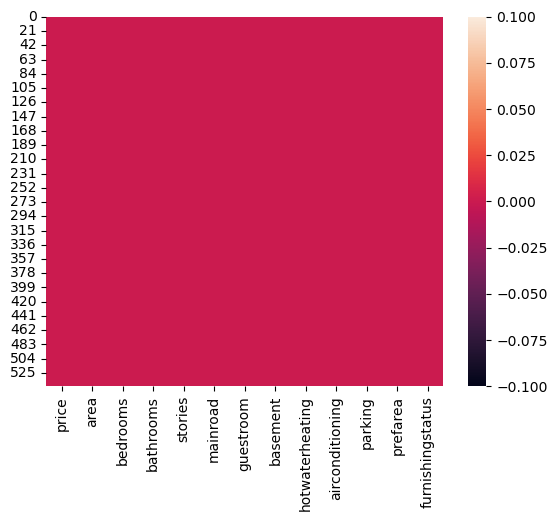

In [6]:
sns.heatmap(df.isnull())

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [10]:
from sklearn.model_selection import train_test_split
x=df.drop(['bedrooms'],axis=1)
y=df['bedrooms']

In [11]:
x

,price,area,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,1,1,no,no,no,no,no,0,no,furnished


In [12]:
y

0      4
1      4
2      3
3      4
4      4
      ..
540    2
541    3
542    2
543    3
544    3
Name: bedrooms, Length: 545, dtype: int64

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [14]:
train_data=x_train.join(y_train)
train_data

,price,area,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,bedrooms
516,2450000,3240,1,1,no,yes,no,no,no,1,no,unfurnished,2
415,3395000,4785,1,2,yes,yes,yes,no,yes,1,no,furnished,3
325,4007500,3460,1,2,yes,no,no,no,yes,0,no,semi-furnished,4
495,2730000,4000,1,2,yes,no,no,no,no,1,no,unfurnished,3
310,4130000,5985,1,1,yes,no,yes,no,no,0,no,semi-furnished,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,3465000,5320,1,1,yes,no,no,no,no,1,yes,unfurnished,2
416,3395000,3450,1,1,yes,no,yes,no,no,2,no,unfurnished,3
88,6475000,7410,1,1,yes,yes,yes,no,yes,2,yes,unfurnished,3
197,4956000,2800,2,2,no,no,yes,no,yes,1,no,semi-furnished,3


array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'area'}>],
       [<AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'stories'}>],
       [<AxesSubplot:title={'center':'parking'}>,
        <AxesSubplot:title={'center':'bedrooms'}>]], dtype=object)

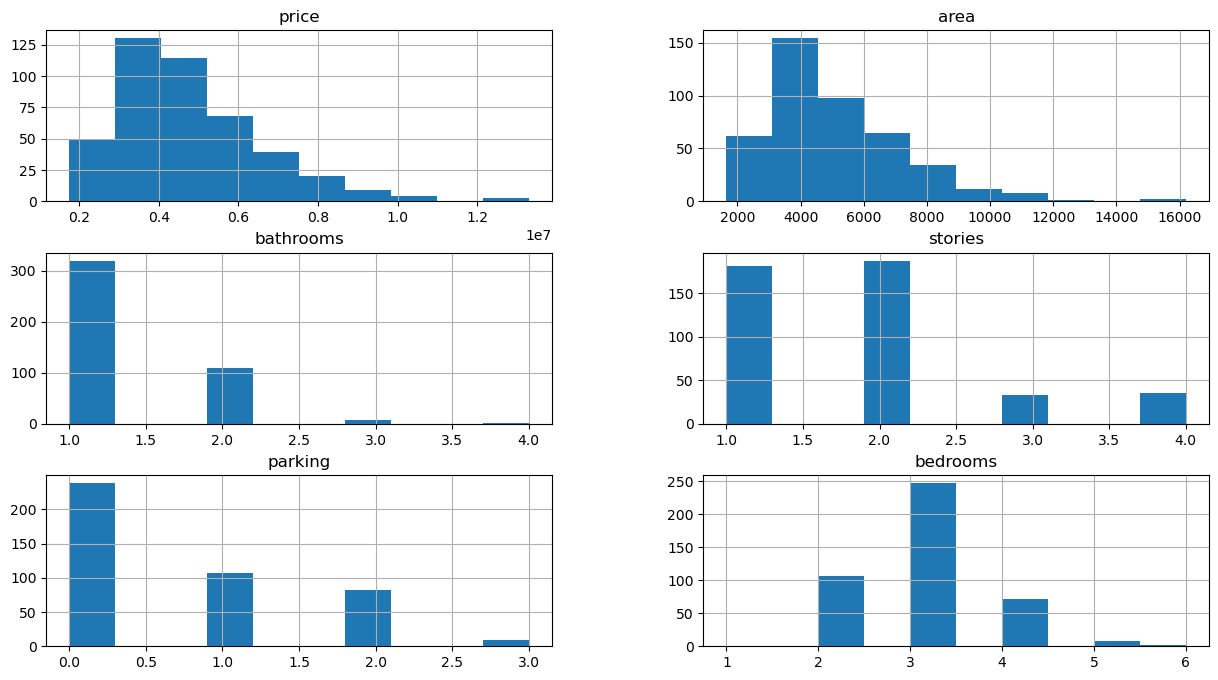

In [18]:
train_data.hist(figsize=(15,8))

<AxesSubplot:>

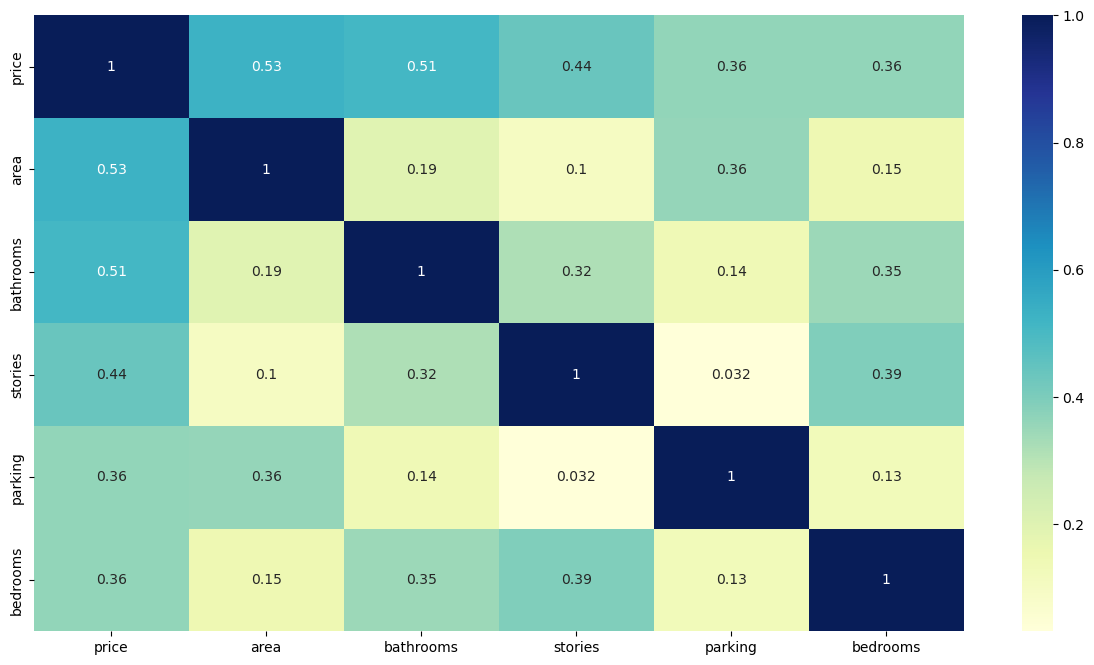

In [20]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

In [32]:
train_data=train_data.join(pd.get_dummies(train_data.furnishingstatus)).drop(['furnishingstatus'],axis=1)
train_data

,price,area,bathrooms,stories,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,bedrooms,furnished,semi-furnished,unfurnished,no,yes
516,2450000,3240,1,1,yes,no,no,no,1,no,2,0,0,1,1,0
415,3395000,4785,1,2,yes,yes,no,yes,1,no,3,1,0,0,0,1
325,4007500,3460,1,2,no,no,no,yes,0,no,4,0,1,0,0,1
495,2730000,4000,1,2,no,no,no,no,1,no,3,0,0,1,0,1
310,4130000,5985,1,1,no,yes,no,no,0,no,3,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,3465000,5320,1,1,no,no,no,no,1,yes,2,0,0,1,0,1
416,3395000,3450,1,1,no,yes,no,no,2,no,3,0,0,1,0,1
88,6475000,7410,1,1,yes,yes,no,yes,2,yes,3,0,0,1,0,1
197,4956000,2800,2,2,no,yes,no,yes,1,no,3,0,1,0,1,0


In [38]:
train_data = pd.DataFrame(train_data)

train_data['guestroom'] = train_data['guestroom'].map({'yes': 1, 'no': 0})
print(df)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

In [62]:
train_data = pd.DataFrame(train_data)

train_data['prefarea'] = train_data['prefarea'].map({'yes': 1, 'no': 0})
print(df)

        price  area  bedrooms  bathrooms  stories mainroad guestroom  \
0    13300000  7420         4          2        3      yes        no   
1    12250000  8960         4          4        4      yes        no   
2    12250000  9960         3          2        2      yes        no   
3    12215000  7500         4          2        2      yes        no   
4    11410000  7420         4          1        2      yes       yes   
..        ...   ...       ...        ...      ...      ...       ...   
540   1820000  3000         2          1        1      yes        no   
541   1767150  2400         3          1        1       no        no   
542   1750000  3620         2          1        1      yes        no   
543   1750000  2910         3          1        1       no        no   
544   1750000  3850         3          1        2      yes        no   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0         NaN              NaN              NaN        2       Na

In [63]:
train_data

,price,area,bathrooms,stories,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,bedrooms,furnished,semi-furnished,unfurnished,no,yes
516,2450000,3240,1,1,1,0,0,0,1,0,2,0,0,1,1,0
415,3395000,4785,1,2,1,1,0,1,1,0,3,1,0,0,0,1
325,4007500,3460,1,2,0,0,0,1,0,0,4,0,1,0,0,1
495,2730000,4000,1,2,0,0,0,0,1,0,3,0,0,1,0,1
310,4130000,5985,1,1,0,1,0,0,0,0,3,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,3465000,5320,1,1,0,0,0,0,1,1,2,0,0,1,0,1
416,3395000,3450,1,1,0,1,0,0,2,0,3,0,0,1,0,1
88,6475000,7410,1,1,1,1,0,1,2,1,3,0,0,1,0,1
197,4956000,2800,2,2,0,1,0,1,1,0,3,0,1,0,1,0


In [98]:
x_test=x_test.join(pd.get_dummies(x_test.furnishingstatus)).drop(['furnishingstatus'],axis=1)
x_test

,price,area,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
42,7700000,6480,2,4,1,0,0,0,1,2,0,0,0,1
196,4970000,7686,1,1,1,1,1,1,0,0,0,0,1,0
155,5530000,6100,2,1,1,0,1,0,0,2,1,1,0,0
445,3150000,3450,1,1,1,0,0,0,0,0,0,1,0,0
259,4473000,6360,1,1,1,0,1,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,5950000,6525,2,4,1,0,0,0,0,1,0,1,0,0
507,2590000,3600,1,1,1,0,0,0,0,0,0,0,0,1
485,2870000,3630,1,1,1,0,0,0,0,0,0,0,0,1
542,1750000,3620,1,1,1,0,0,0,0,0,0,0,0,1


In [99]:
x_test = pd.DataFrame(x_test)

x_test['airconditioning'] = x_test['airconditioning'].map({'yes': 1, 'no': 0})
print(df)

        price  area  bedrooms  bathrooms  stories mainroad guestroom  \
0    13300000  7420         4          2        3      yes        no   
1    12250000  8960         4          4        4      yes        no   
2    12250000  9960         3          2        2      yes        no   
3    12215000  7500         4          2        2      yes        no   
4    11410000  7420         4          1        2      yes       yes   
..        ...   ...       ...        ...      ...      ...       ...   
540   1820000  3000         2          1        1      yes        no   
541   1767150  2400         3          1        1       no        no   
542   1750000  3620         2          1        1      yes        no   
543   1750000  2910         3          1        1       no        no   
544   1750000  3850         3          1        2      yes        no   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0         NaN              NaN              NaN        2       Na

In [101]:
x_test

,price,area,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
42,7700000,6480,2,4,1,0,0,0,NaN,2,0,0,0,1
196,4970000,7686,1,1,1,1,1,1,NaN,0,0,0,1,0
155,5530000,6100,2,1,1,0,1,0,NaN,2,1,1,0,0
445,3150000,3450,1,1,1,0,0,0,NaN,0,0,1,0,0
259,4473000,6360,1,1,1,0,1,0,NaN,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,5950000,6525,2,4,1,0,0,0,NaN,1,0,1,0,0
507,2590000,3600,1,1,1,0,0,0,NaN,0,0,0,0,1
485,2870000,3630,1,1,1,0,0,0,NaN,0,0,0,0,1
542,1750000,3620,1,1,1,0,0,0,NaN,0,0,0,0,1


In [65]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [67]:
x_train=scaler.fit_transform(x_train)

In [74]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
from sklearn.model_selection import cross_val_score

In [104]:
regression=LinearRegression()

In [78]:
mse=cross_val_score(regression,x_train,y_train,scoring='neg_mean_squared_error',cv=10)

In [79]:
np.mean(mse)

-0.41966974117476086